# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
Dataset ini berjudul "Students Performance in Exams" dan diperoleh dari Kaggle.
Dataset ini berisi informasi tentang hasil ujian siswa dalam tiga mata pelajaran: Matematika, Membaca, dan Menulis,
serta beberapa atribut demografis yang berkaitan seperti jenis kelamin, tingkat pendidikan orang tua,
jenis makan siang, dan apakah mereka mengikuti kursus persiapan ujian.
Dataset ini cocok digunakan untuk analisis performa akademik dan membangun model prediktif sederhana.
Sumber: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


In [1]:
# ================================================
# STEP 0: Setup Kaggle API dan Unduh Dataset
# ================================================

# Upload file kaggle.json
from google.colab import files
files.upload()  # pilih file kaggle.json

# Buat direktori ~/.kaggle dan salin credential
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset dari Kaggle
!kaggle datasets download -d spscientist/students-performance-in-exams

# Ekstrak file ZIP
!unzip students-performance-in-exams.zip -d namadataset_raw


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 51.2MB/s]
Archive:  students-performance-in-exams.zip
  inflating: namadataset_raw/StudentsPerformance.csv  


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
# 3. MEMUAT DATASET
raw_path = 'namadataset_raw/StudentsPerformance.csv'  # path relatif

In [4]:
# Membaca dataset
try:
    df = pd.read_csv(raw_path)
    print("Dataset berhasil dimuat!")
    print(df.head())
except Exception as e:
    print("Gagal memuat dataset:", e)

Dataset berhasil dimuat!
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
print("\n📌 Informasi Umum Dataset:")
print(df.info())
print("\n📊 Statistik Deskriptif:")
print(df.describe())



📌 Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

📊 Statistik Deskriptif:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17

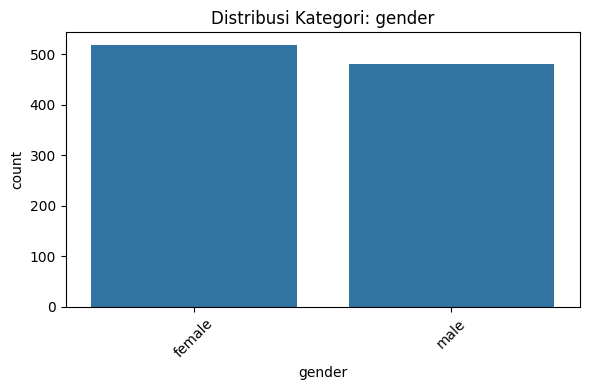

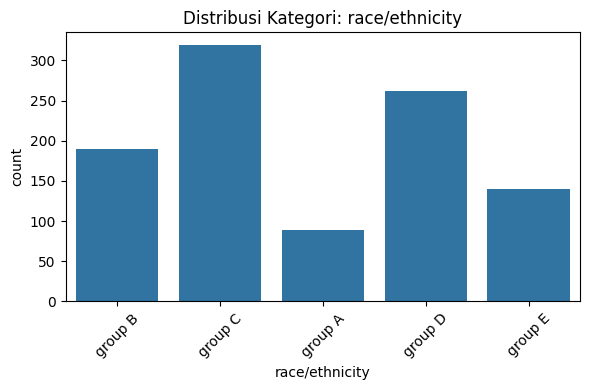

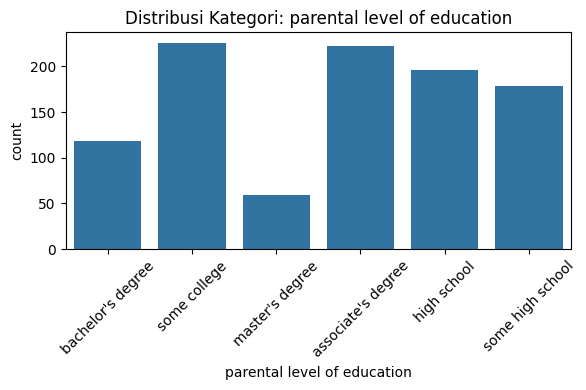

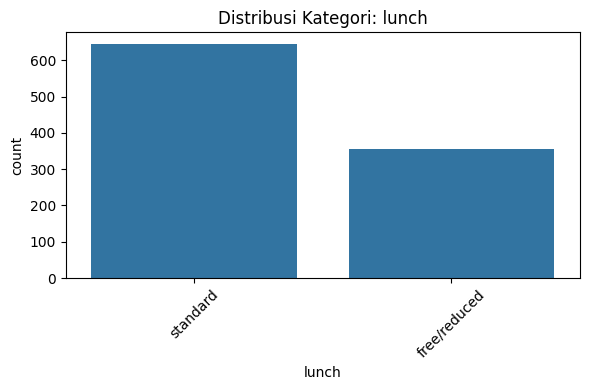

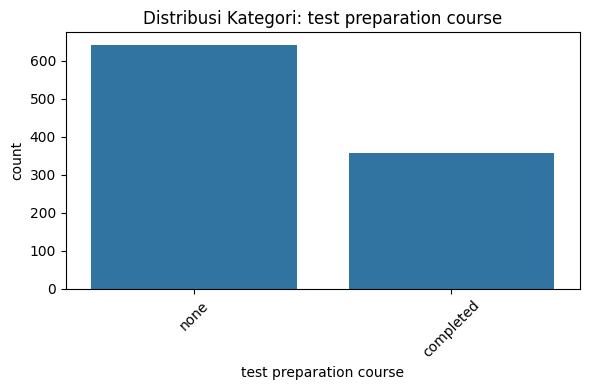

In [6]:
# Visualisasi kategori
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribusi Kategori: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

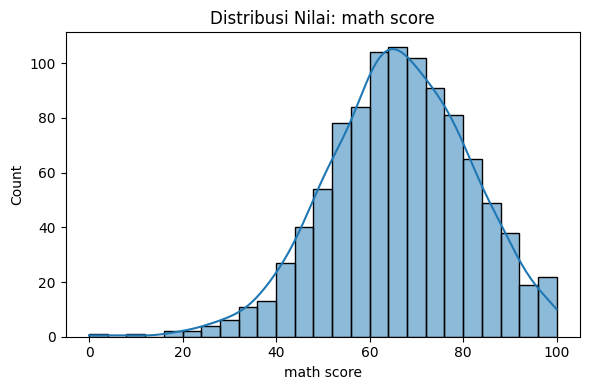

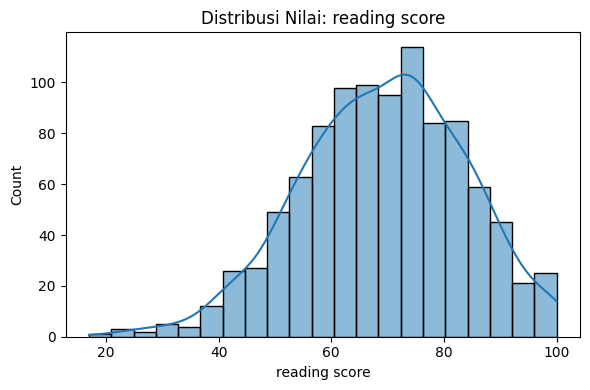

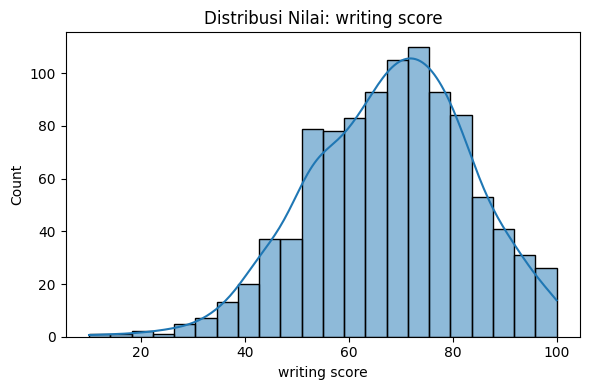

In [7]:
# Visualisasi distribusi skor
score_cols = ['math score', 'reading score', 'writing score']
for col in score_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi Nilai: {col}')
    plt.tight_layout()
    plt.show()

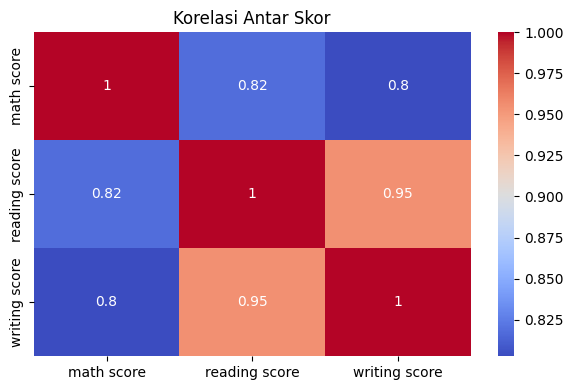

In [8]:
# Korelasi antar skor
plt.figure(figsize=(6,4))
sns.heatmap(df[score_cols].corr(), annot=True, cmap="coolwarm")
plt.title('Korelasi Antar Skor')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
# A. Salin data asli
df_clean = df.copy()

In [10]:
# B. Rename kolom jadi lowercase + snake_case
df_clean.columns = df_clean.columns.str.replace(" ", "_").str.lower()

In [11]:
# C. 1. Tangani Missing Values
missing_count = df_clean.isnull().sum()
print("\n1️⃣ Missing Values:")
print(missing_count)
if missing_count.sum() > 0:
    df_clean.dropna(inplace=True)
    print("✔ Missing values dihapus.")
else:
    print("✔ Tidak ada missing values.")


1️⃣ Missing Values:
gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64
✔ Tidak ada missing values.


In [12]:
# D. 2. Hapus Duplikasi
duplicate_count = df_clean.duplicated().sum()
print("\n2️⃣ Data Duplikat:", duplicate_count)
if duplicate_count > 0:
    df_clean = df_clean.drop_duplicates()
    print("✔ Duplikasi dihapus.")
else:
    print("✔ Tidak ada duplikasi.")


2️⃣ Data Duplikat: 0
✔ Tidak ada duplikasi.


In [16]:
# 3. Normalisasi/Standarisasi Kolom Numerik
numeric_cols = ['math_score', 'reading_score', 'writing_score']

# Backup nilai asli skor
df_clean['math_score_original'] = df_clean['math_score']
df_clean['reading_score_original'] = df_clean['reading_score']
df_clean['writing_score_original'] = df_clean['writing_score']

# Standarisasi skor
scaler = StandardScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

print("\n3️⃣ Normalisasi: Standarisasi dilakukan pada kolom:", numeric_cols)



3️⃣ Normalisasi: Standarisasi dilakukan pada kolom: ['math_score', 'reading_score', 'writing_score']


In [22]:
# F. 4. Deteksi & Penanganan Outlier (IQR method)
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"\n4️⃣ Outlier pada {col}: {len(outliers)} data")
    # Hapus outlier
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]



4️⃣ Outlier pada math_score: 0 data

4️⃣ Outlier pada reading_score: 0 data

4️⃣ Outlier pada writing_score: 0 data


In [24]:
# H. 6. Binning (Pengelompokan) nilai skor matematika
# Buat kolom baru berdasarkan kategori nilai
# 0: rendah (0-60), 1: sedang (61-80), 2: tinggi (81-100)
def bin_math(score):
    score = score * df['math score'].std() + df['math score'].mean()  # balik dari standar deviasi
    if score <= 60:
        return 0
    elif score <= 80:
        return 1
    else:
        return 2

df_clean['math_score_binned'] = df_clean['math_score'].apply(bin_math)
print("\n6️⃣ Binning skor matematika selesai. Contoh nilai bin:")
print(df_clean['math_score_binned'].value_counts())

# Simpan hasil preprocessing
output_dir = 'preprocessing/namadataset_preprocessing'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'StudentsPerformance_cleaned.csv')
df_clean.to_csv(output_path, index=False)
print("\n💾 Dataset yang sudah dibersihkan disimpan di:", output_path)


6️⃣ Binning skor matematika selesai. Contoh nilai bin:
math_score_binned
1    468
0    325
2    193
Name: count, dtype: int64

💾 Dataset yang sudah dibersihkan disimpan di: preprocessing/namadataset_preprocessing/StudentsPerformance_cleaned.csv


In [25]:
# 5. SPLIT DATA UNTUK MODEL
print("\n📤 Tahap Split Data untuk Training dan Testing")

# Target prediksi: math_score_binned (klasifikasi)
X = df_clean.drop(columns=['math_score_binned', 'math_score_original', 'reading_score_original', 'writing_score_original'])
y = df_clean['math_score_binned']

# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nUkuran data:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


📤 Tahap Split Data untuk Training dan Testing

Ukuran data:
X_train: (788, 13), X_test: (198, 13)
y_train: (788,), y_test: (198,)


In [26]:
# automate_Nurfadilah.py

import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

def load_and_preprocess_dataset(raw_path='namadataset_raw/StudentsPerformance.csv',
                                 save_cleaned=True,
                                 output_dir='preprocessing/namadataset_preprocessing',
                                 test_size=0.2,
                                 random_state=42):
    # ===============================
    # 1. Load Dataset
    # ===============================
    try:
        df = pd.read_csv(raw_path)
        print("✅ Dataset loaded successfully.")
    except Exception as e:
        print("❌ Failed to load dataset:", e)
        return None, None, None, None

    # ===============================
    # 2. Rename Columns (snake_case)
    # ===============================
    df.columns = df.columns.str.replace(" ", "_").str.lower()

    # ===============================
    # 3. Missing Values Handling
    # ===============================
    if df.isnull().sum().sum() > 0:
        df.dropna(inplace=True)
        print("✔ Missing values removed.")

    # ===============================
    # 4. Drop Duplicates
    # ===============================
    df.drop_duplicates(inplace=True)

    # ===============================
    # 5. Backup Original Numeric Scores
    # ===============================
    for col in ['math_score', 'reading_score', 'writing_score']:
        df[col + '_original'] = df[col]

    # ===============================
    # 6. Outlier Removal (IQR)
    # ===============================
    for col in ['math_score', 'reading_score', 'writing_score']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]

    # ===============================
    # 7. Label Encoding
    # ===============================
    label_cols = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
    le = LabelEncoder()
    for col in label_cols:
        df[col + '_original'] = df[col]
        df[col] = le.fit_transform(df[col])

    # ===============================
    # 8. Normalisasi
    # ===============================
    numeric_cols = ['math_score', 'reading_score', 'writing_score']
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # ===============================
    # 9. Binning Target Variable
    # ===============================
    def bin_math(score_std):
        mean = df['math_score_original'].mean()
        std = df['math_score_original'].std()
        actual = score_std * std + mean
        if actual <= 60:
            return 0
        elif actual <= 80:
            return 1
        else:
            return 2

    df['math_score_binned'] = df['math_score'].apply(bin_math)

    # ===============================
    # 10. Save Cleaned Dataset
    # ===============================
    if save_cleaned:
        os.makedirs(output_dir, exist_ok=True)
        df.to_csv(os.path.join(output_dir, 'StudentsPerformance_cleaned.csv'), index=False)
        print(f"💾 Cleaned dataset saved to {output_dir}/StudentsPerformance_cleaned.csv")

    # ===============================
    # 11. Split Data
    # ===============================
    X = df.drop(columns=['math_score_binned', 'math_score_original', 'reading_score_original', 'writing_score_original'])
    y = df['math_score_binned']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    print(f"📤 Data split completed: {X_train.shape[0]} train / {X_test.shape[0]} test")
    return X_train, X_test, y_train, y_test


# Contoh penggunaan
if __name__ == "__main__":
    X_train, X_test, y_train, y_test = load_and_preprocess_dataset()


✅ Dataset loaded successfully.
💾 Cleaned dataset saved to preprocessing/namadataset_preprocessing/StudentsPerformance_cleaned.csv
📤 Data split completed: 788 train / 198 test
